# Predicting Sales Price of Houses

For this assignment, I extensively use plotly, seaborn and matplotlib for data visualization and ML Algorithms to predict house prices in Ames. This is a regression problem.

 **Goal** <br>
Predict the sales price for each house. For each Id in the test set, I must predict the value of the SalePrice variable. 

 **Metric** <br>
Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the **logarithm** of the predicted value and the **logarithm** of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

More details can be found out [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation)

# Contents

* [1. Importing Packages & Collecting Data](#1)
* [2. Variable Description, Visualization, and Correction](#2)
* [3. Correlation Matrix - **1(b)**](#3)
* [4. Checking Linearity and Removing Outliers](#4)
* [5. Handling Missing Variables - **1(a)**](#5)
* [6. Transforming Skewed Variables to Normal Variables](#6)
* [7. Feature Scaling - **1(c)**](#7)
* [8. Handling Categorical Variables through Encoding - **1(a)**](#8)
    * [8.1 Manual Label Encoding](#8.1)
    * [8.2 One Hot Encoding](#8.2)
* [9. Model Building and Evaluation - **2 and 3**](#9)
   * [9.1 Model Training](#9.1)
   * [9.2 Model Evaluation](#9.2)
     * [9.2.1 K-Fold Cross Validation](#9.2.1)
     * [9.2.2 Optimization of Hyperparameters](#9.2.2)
       * [9.2.2.1 Optimizing Support Vector Regression (SVR) - **2(a)** ](#9.2.2.1)
       * [9.2.2.2 Optimizing Decision Tree Regressor (DT) - **2(b)**](#9.2.2.2)
       * [9.2.2.3 Optimizing Random Forest Regressor (RF) - **2(c)**](#9.2.2.3)
       * [9.2.2.4 Random Forest Regressor (RF) after PCA - **3**](#9.2.2.4)
       
     * [9.2.3 Retrain and Predict Using Best Hyperparameters](#9.2.3)

# 1. Importing Packages and Collecting Data <a id="1"></a>

In [3]:
'''Importing Data Manipulattion Moduls'''
import numpy as np
import pandas as pd

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

'''plotly Visualization'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [45]:
'''Read in train and test data from csv files'''
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 2. Variable Description, Visualization, and Correction <a id="2"></a>

In [46]:
'''Train and test data at a glance'''
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
'''Dimensions of train and test data'''
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


In [49]:
"""Let's check the columns names"""
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

**Delailed description of the variables can be found [here.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)**

#### Initial observation from the dataset
* I have total 81 variables for train and 80 for test variable
* I don't have *SalePrice* variable for test variable because this will be our task to infer *SalePrice* for test set by learning from train set.
* So *SalePrice* is our target variable and rest of the variables are our predictor variables.

In [50]:
"""Let's merge the train and test data and inspect the data type"""
merged = pd.concat([train, test], axis=0, sort=True)
display(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      26
float64    12
dtype: int64

Dimensions of data: (2919, 81)


In [51]:
'''Extracting numerical variables first'''
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))
print('\n')
display(num_merged.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [52]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

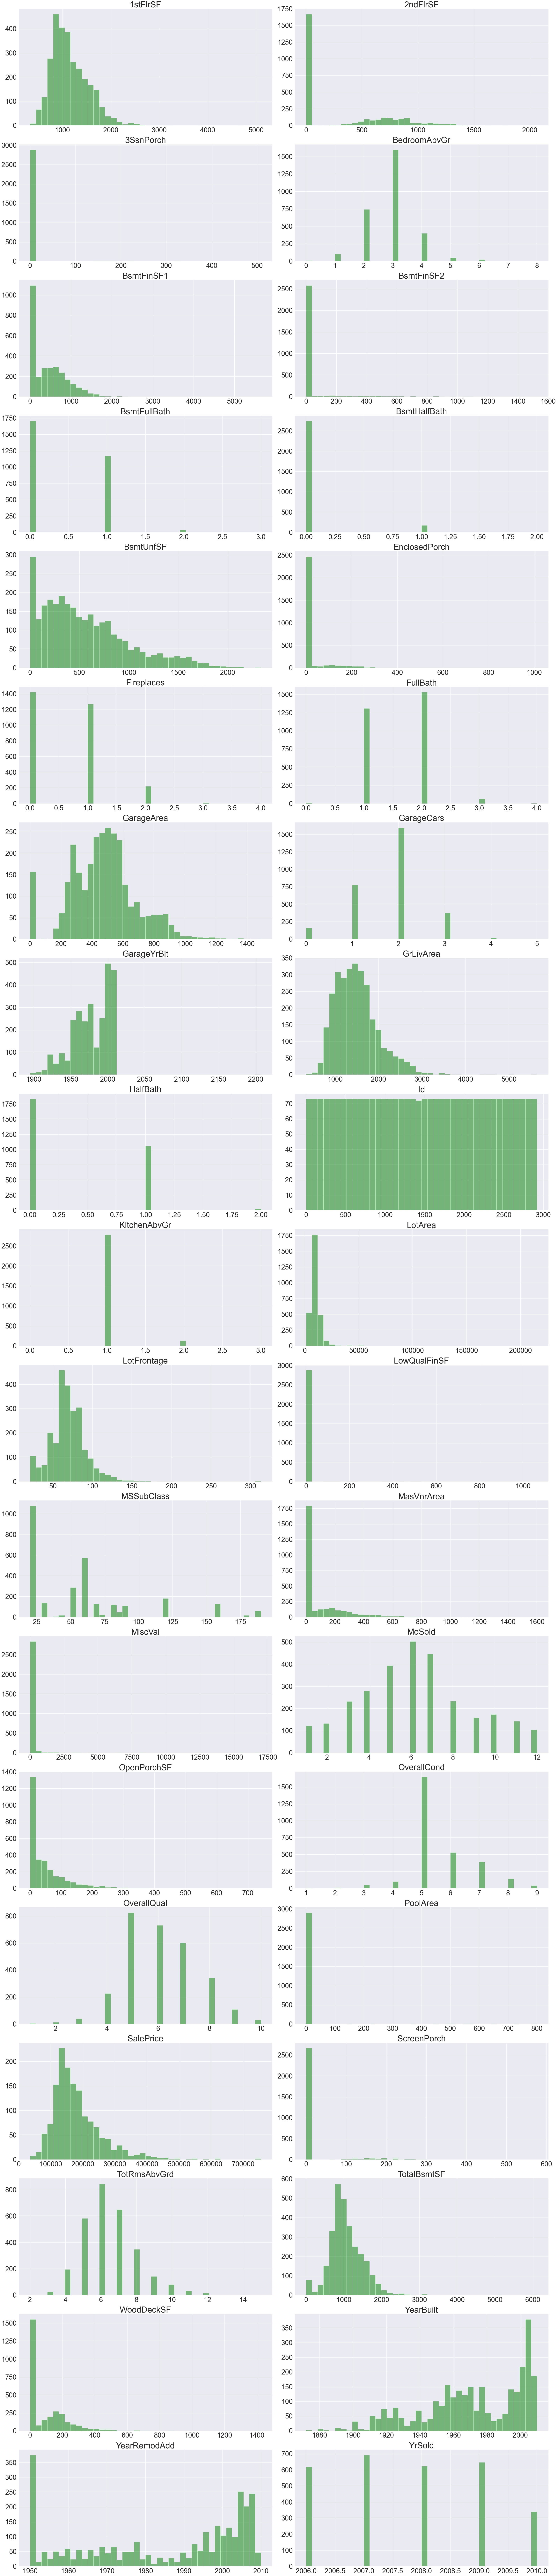

In [53]:
draw_histograms(num_merged, num_merged.columns, 19, 2)

**From the above histrogram plots, the numerical variables can be clearly visualized. Some key observations are:**
* There are two types of numerical variables in this dataset. Discrete and Continuos. 
* Examples of discrete variables are MSSubClass, OverallQual, OverallCond, BsmtFullBath, HalfBath etc.
* Examples of continuous variables are LotFrontage, LotArea, and YearBuilt. 
* **BUT** some discrete variables are actually categorical like MSSubClass, OverallQual, and OverallCond. 

*For detailed data documentation see data_description.txt [here.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)*

Converting MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.

In [54]:
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual',
                                                                                               'OverallCond', 'MoSold', 
                                                                                               'YrSold']].astype('object')

Checking out the data type after correction.

In [55]:
merged.dtypes.value_counts()

object     48
int64      21
float64    12
dtype: int64

### Creating functions for scatter, bar and histogram plots using plotly.

In [56]:
'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x,
                        y = y,
                        mode = 'markers',
                        marker = dict(color = y, size=size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(x = x,
                   y = y,
                   marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot histogram'''
def histogram_plot(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# 3. Correlation Matrix - 1(b) <a id="3"></a>

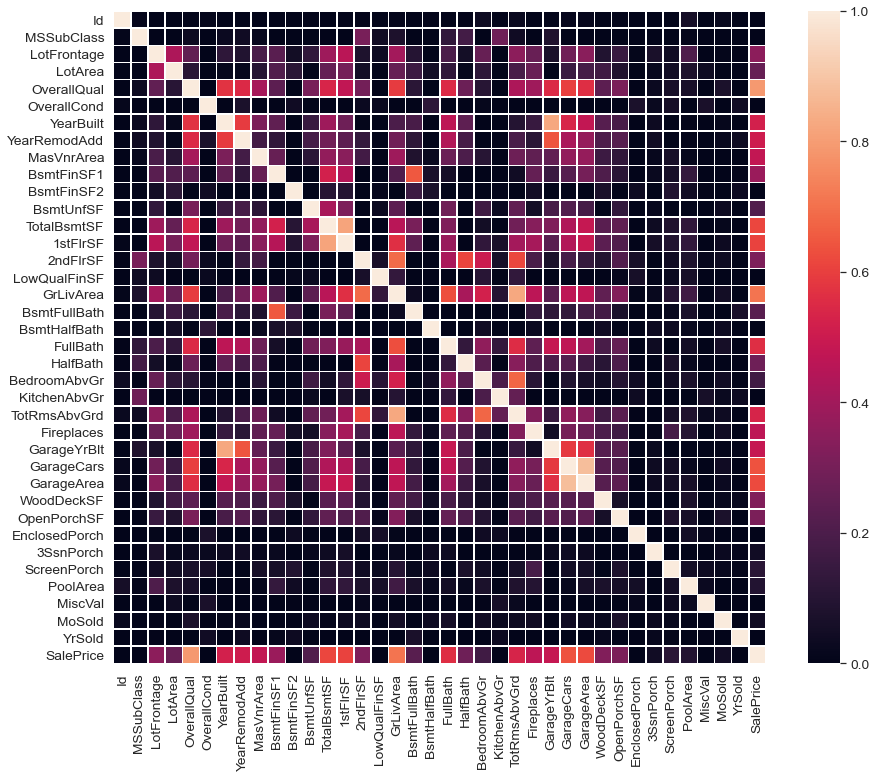

In [57]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True);

At first sight, <font color = orange>**LIGHT ORANGE**</font> colored squares from the correlation matrix get my attention because they show strong correlation between the target variable **'SalePrice'** (dependent variable) and  **'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF' 'GarageArea'** (independed variables).

#### 'SalePrice' correlation matrix

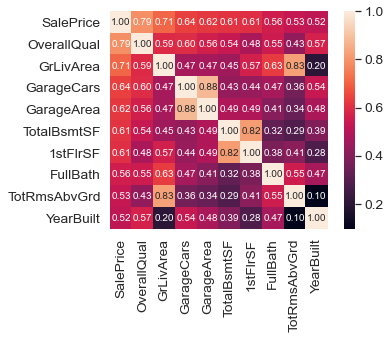

In [58]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**These are the variables that are highly correlated with 'SalePrice'. My observation on this correlation matrix:**

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
 
* 'GarageCars' and 'GarageArea' are also strongly correlated variables. However, the no. of cars that fit into the garage is a consequence of the garage area. So, 'GarageCars' and 'GarageArea' are like twin brothers. We will never be able to distinguish them. Therefore, I just need one of these variables in our analysis (I am keeping 'GarageCars' since its correlation with 'SalePrice' is higher).

**<font color=blue>Based on the correlation matrix with the target variable, the following variables can play an important role in this problem:</font>**

* **OverallQual**
* **GarageCars**
* **YearBuilt**
* **FullBath**
* **TotalBsmtSF**
* **GrLivArea**

# 4. Checking Linearity and Removing Outliers <a id="4"></a>
The best way to check linear relationship is to plot scatter diagram. So, I plot the scatter plot of various variables and check their linearity. At the same time, observing the scatter plot, I also remove the outliers

In [59]:
'''Scatter plot of GrLivArea vs SalePrice.'''
scatter_plot(train.GrLivArea, train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

*So 'SalePrice' and 'GrLivArea' show* ***linear relationship.***

Removing **Outliers** from GrLivArea.

In [60]:
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [61]:
'''Scatter plot of GrLivArea vs SalePrice.'''
scatter_plot(train.GrLivArea, train.SalePrice, 'GrLivArea vs SalePrice (after removing outliers)', 'GrLivArea', 'SalePrice'
             ,10, 'Rainbow')

In [62]:
'''Scatter plot of TotalBsmtSF Vs SalePrice'''
scatter_plot(train.TotalBsmtSF, train.SalePrice, 'TotalBsmtSF Vs SalePrice', 'TotalBsmtSF', 'SalePrice', 10, 'Cividis')

*So 'SalePrice' and 'TotalBsmt' also show* ***linear relationship.*** Another observation is that at zero total sq.ft of basement area, there is also sale prices of some houses.

Removing **Outliers** from TotalBsmt 

In [63]:
'''Drop observations where TotlaBsmtSF is greater than 3000 sq.ft'''
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [64]:
'''Scatter plot of TotalBsmtSF Vs SalePrice'''
scatter_plot(train.TotalBsmtSF, train.SalePrice, 'TotalBsmtSF Vs SalePrice (after removing outliers)', 'TotalBsmtSF', 
             'SalePrice', 10, 'Cividis')

In [65]:
'''Scatter plot of YearBuilt Vs SalePrice'''
scatter_plot(train.YearBuilt, np.log1p(train.SalePrice), 'YearBuilt Vs SalePrice', 'YearBuilt', 'SalePrice', 10, 'viridis')

*So 'SalePrice' and 'YearBuilt' also show* ***linear relationship.***

**Note:** We don't know if SalePrice is affected by inflation or not.

Removing **Outliers** from YearBuilt 

In [66]:
'''Drop observations where YearBulit is less than 1893 sq.ft'''
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [67]:
'''Scatter plot of YearBuilt Vs SalePrice'''
scatter_plot(train.YearBuilt, np.log1p(train.SalePrice), 'YearBuilt Vs SalePrice (after removing outliers)', 'YearBuilt',
             'SalePrice', 10, 'viridis')

***I log transform the SalePrice for more clear linear relationship in case of the plots below: ***

In [72]:
'''Scatter plot of GarageCars Vs SalePrice'''
scatter_plot(train.GarageCars, np.log(train.SalePrice), 'GarageCars Vs SalePrice', 'GarageCars', 'SalePrice', 10, 
             'Electric')

*So 'SalePrice' and 'GarageCars' show* ***linear relationship.***

In [74]:
'''Scatter plot of OverallQual Vs SalePrice'''
scatter_plot(train.OverallQual, np.log(train.SalePrice), 'OverallQual Vs SalePrice', 'OverallQual', 'SalePrice', 10, 
             'Bluered')

*So 'SalePrice' and 'OverallQual' show* ***linear relationship.***

In [75]:
'''Scatter plot of FullBath Vs SalePrice'''
scatter_plot(train.FullBath, np.log(train.SalePrice), 'FullBath Vs SalePrice', 'FullBath', 'SalePrice', 10, 'RdBu')

*So 'SalePrice' and 'FullBath' show* ***linear relationship.*** 

**In summary:**

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual', FullBath and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual'.

# 5. Handling Missing Variables - 1(a) <a id="5"></a>
The simpliest way to replace missing values of a variable is to impute its missing values with its mean, median or mode depending on its distribution and variable type (categorical or numerical). For categorical variables, mode-imputation is performed and for numerical variable, mean-imputation is performed if their distribution is symmetric (or almost symmetric or normal). On the other hand, for a variable with skewed distribution and outliers, median-imputation is recommended as median is more immune to outliers than mean.

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant. So simply replacing missing values with the mean or the median might not be the best solution since missing values may differ by groups and categories. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median to impute the missing values of a variable.

In [76]:
'''Separate our target variable first'''
y_train = train.SalePrice

'''Drop SalePrice from train data.'''
train.drop('SalePrice', axis = 1, inplace = True)

'''Now combine train and test data frame together.'''
df_merged = pd.concat([train, test], axis = 0)

'''Dimensions of new data frame'''
df_merged.shape

(2897, 80)

In [77]:
'''Again convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

In [79]:
'''Columns with missing observation'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values
'''Number of columns with missing observation'''
total_missing_columns = np.count_nonzero(df_merged.isnull().sum())
print('We have' , total_missing_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have 34 features with missing values and those features (with missing values) are: 

 ['MSZoning' 'LotFrontage' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Electrical' 'BsmtFullBath' 'BsmtHalfBath' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageYrBlt' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence'
 'MiscFeature' 'SaleType']


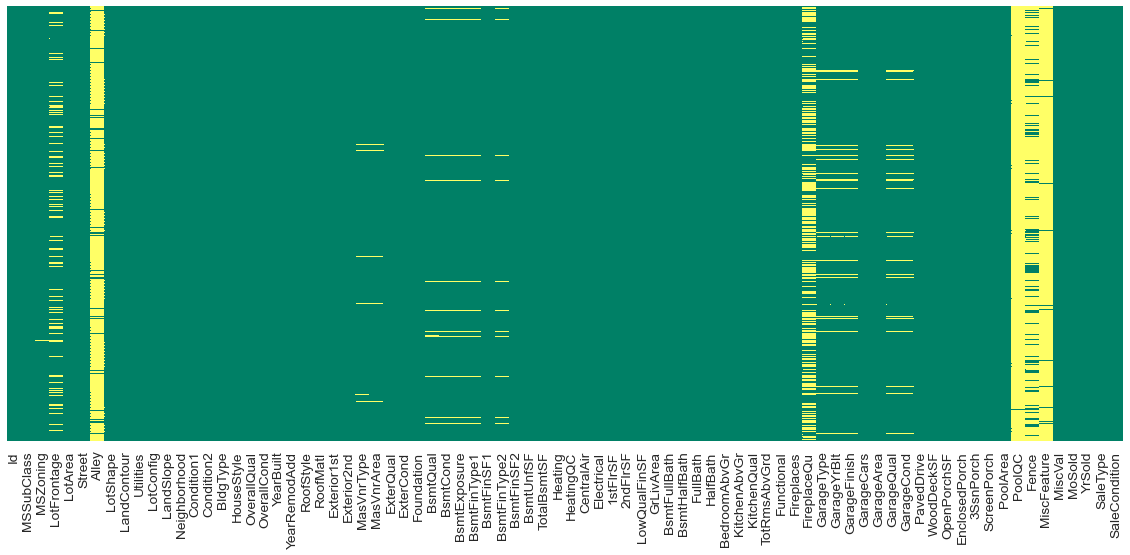

In [81]:
'''Simple visualization of missing variables'''
plt.figure(figsize=(20,8))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap = 'summer');

In [82]:
'''Get and plot only the features (with missing values) and their corresponding missing values.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
x = missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, 'Features Having Missing Observations','Missing Values', 20, 'Viridis')

In [83]:
missing_columns

MSZoning           4
LotFrontage      485
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      79
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1410
GarageType       155
GarageYrBlt      157
GarageFinish     157
GarageCars         1
GarageArea         1
GarageQual       157
GarageCond       157
PoolQC          2889
Fence           2331
MiscFeature     2793
SaleType           1
dtype: int64

**Variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu have most missing values**.<br> 
Usually we drop a variable if at least 40% of its values are missing. Hence, one might tempt to drop variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu. Deleting these variables would be a blunder because data description tells these 'NaN' has some purpose for those variables. Like 'NaN' in PoolQC refers to 'No Pool', 'NaN' in MiscFeature refers to 'None', and 'NaN' in Alley means 'No alley access' etc. More generally NaN means the absent of that variable. Hence I am replacing NaN with 'None' in those variable.

In [84]:
'''Impute by None where NaN means something.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [85]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [86]:
'''The following variables are either discrete numerical or continuous numerical variables. So they will be imputed by median.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

**'LotFrontage' is still left to be imputed becuase:**

Almost 17% observations of LotFrontage are missing in. Hence, simply imputing LotFrontage by mean or median might introduce bias as the amount of missing values is significant. Again LotFrontage may differ by different categories of house. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median of LotFrontage to impute the missing values of it. This method may result in better accuracy without high bias, unless a missing value is expected to have a very high variance.

In [87]:
'''We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables 
into numerical.'''
df = df_merged.drop(columns=['Id','LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,617,1,1,3,3,0,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,892,1,1,3,3,0,2,0,...,0,0,3,4,1,0,4,1,8,4


In [88]:
 # Inserting Age in variable correlation.
df['LotFrontage'] = df_merged['LotFrontage']
# Move Age at index 0.
df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,617,1,1,3,3,0,4,...,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,892,1,1,3,3,0,2,...,0,0,3,4,1,0,4,1,8,4


In [89]:
'''correlation of df'''
corr = df.corr()
display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
LotArea        0.639965
1stFlrSF       0.420257
GarageArea     0.360497
GrLivArea      0.347875
Name: LotFrontage, dtype: float64

LotConfig    -0.191054
GarageType   -0.295651
MSSubClass   -0.398100
BldgType     -0.486039
Utilities          NaN
Name: LotFrontage, dtype: float64

***Only 'BldgType' categorical variable has the highest correlation with LotFrontage***

In [90]:
'''Impute LotFrontage with median of respective columns (i.e., BldgType)'''
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [91]:
'''Is there any missing values left untreated??'''
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


# 6. Transforming Skewed Variables to Normal Variables <a id="6"></a>
Normal distribution (bell-shaped) of variables is one of the assumptions of regression problems. In this section, I try to make the skewed distribution as normal as possible. Since most of the variables are positively skewed, I would apply log transformation on them. **The target variable will be oserved separately:**

If skewness is 0, the data is perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [92]:
'''Skewness and Kurtosis of SalePrice'''
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 1.529700
Kurtosis: 3.801796


In [93]:
'''Plot the distribution of SalePrice with skewness.'''
histogram_plot(y_train, 'SalePrice without Transformation', 'Abs Frequency', 'deepskyblue')

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*

In [94]:
'''Plot the distribution of SalePrice with skewness'''
y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
histogram_plot(y_train, title, 'Abs Frequency', ' darksalmon')

In [95]:
'''Now calculate the rest of the explanatory variables'''
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

,Skewness
MiscVal,21.881799
PoolArea,18.653165
LotArea,13.135552
LowQualFinSF,12.515094
3SsnPorch,11.338027
KitchenAbvGr,4.250236
BsmtFinSF2,4.153746
EnclosedPorch,4.066188
ScreenPorch,3.930502
BsmtHalfBath,3.930474


In [96]:
'''Plot the skewness for rest of the explanetory variables'''
bar_plot(skew_num_sorted.index, skew_num_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Blackbody')

In [97]:
'''Extract numeric variables merged data.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [98]:
'''Make the tranformation of the explanatory variables'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])


#Normal variables
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
#Merging
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [99]:
'''Update numerical variables with transformed variables.'''
df_merged_num.update(df_merged_num_all)

C:\Users\Md Rakib\miniconda3\lib\site-packages\pandas\core\frame.py:5732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df_merged_num_all.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,PoolArea,MiscVal,Id,YearBuilt,YearRemodAdd,FullBath,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,...,0.0,0.0,1,2003,2003,2,3,2003.0,2.0,548.0
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,...,0.0,0.0,2,1976,1976,2,3,1976.0,2.0,460.0
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,...,0.0,0.0,3,2001,2002,2,3,2001.0,2.0,608.0
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,...,0.0,0.0,4,1915,1970,1,3,1998.0,3.0,642.0
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,...,0.0,0.0,5,2000,2000,2,4,2000.0,3.0,836.0


In [101]:
df_merged_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,4.189655,9.042040,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,...,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0
1,2,4.394449,9.169623,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,...,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0
2,3,4.234107,9.328212,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,...,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0
3,4,4.110874,9.164401,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,...,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0
4,5,4.442651,9.565284,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,...,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0


# 7. Feature Scaling - 1(c) <a id="7"></a>
Feature scaling helps gradient descent converge faster, thus reducing training time. In sklearn we have various methods like from MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler,Normalizer, QuantileTransformer, PowerTransformer to scale features.

Two well known strategies for rescaling data are normalization and standarization. Normalization scales all numeric variables in the range [0,1]. So outliers might be lost. On the other hand, standarization transforms data to have zero mean and unit variance.

Here, due to the presence of outliers, I am using **Sklearn's RobustScaler** since it is not affected by outliers.

In [102]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Creating scaler object.'''
scaler = RobustScaler()

'''Fit scaler object on train data.'''
scaler.fit(df_merged_num)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = scaler.transform(df_merged_num)

In [103]:
'''Retrive column names'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = 
                                    df_merged_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.

# 8. Handling Categorical Variables through Encoding - 1(a) <a id="8"></a>
We have to encode categorical variables for our machine learning algorithms to interpret them. I am using label encoding and then one-hot encoding.

## 8.1 Manual Label Encoding <a id="8.1"></a>
I am manually encoding some categorical (ordinal) variables to preserve their ordinality. If we use sklearn's label encoder, it will randomly encode these ordinal variables and therefore ordinality would be lost. To overcome this, we will use pandas replace method to manually encode orninal variables.<br> 

***Variables like LotShape, LandContour, Utilities, LandSlope, OverallQual (already encoded), OverallCond (already encoded), ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, BsmtFinType2, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence have inherent orders. So, I will encode them manually.***

In [104]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding of ordinal variable"""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
                                   value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                                   value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4],
                                 inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], 
                                 value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], 
                                  inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], 
                                 inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5],
                                 inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], 
                            inplace = True)

In [105]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

## 8.2 One Hot Encoding <a id="8.2"></a>
Categorical variables without any inherent order is converted into numerical for our model using pandas get_dummies method.

In [106]:
'''Now selecting the nominal vaiables for one hot encording'''
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

"""Let's get the dummies variable"""
df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

In [107]:
"""Let's concat one hot encoded and label encoded variable together"""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)

'''Finally join processed categorical and numerical variables'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis=1)

'''Dimensions of new data frame'''
df_merged_processed.shape

(2897, 224)

In [108]:
'''Now retrieve train and test data for modelling.'''
df_train_final = df_merged_processed.iloc[0:1438, :]
df_test_final = df_merged_processed.iloc[1438:, :]

'''And we have our target variable as y_train.'''
y_train = y_train

In [109]:
'''Updated train data'''
df_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,4,2,6,0,2,3,3,2,0,0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,4,1,6,3,2,3,3,2,0,0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,4,2,6,3,2,3,3,2,0,0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,4,2,6,4,1,3,3,2,0,0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,4,2,6,3,2,3,3,2,0,0


In [110]:
'''Updated test data'''
df_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,-1.007539,-0.282415,-0.252720,0.638298,0.256410,1.034716,0.097744,0.0,-0.868727,-0.290107,...,4,2,6,0,2,3,3,2,0,0
1,-1.006854,0.509600,0.040019,0.063830,-0.435897,0.000000,0.147083,0.0,-0.377642,0.495238,...,4,1,6,3,2,3,3,2,0,0
2,-1.006169,-0.110504,0.403904,0.595745,0.230769,0.997612,0.041239,0.0,-0.050728,-0.144256,...,4,2,6,3,2,3,3,2,0,0
3,-1.005483,-0.587089,0.028038,-1.234043,-0.589744,0.000000,-0.081293,0.0,0.117866,-0.541370,...,4,2,6,4,1,3,3,2,0,0
4,-1.004798,0.696015,0.947867,0.574468,0.179487,1.147836,0.086395,0.0,0.042894,0.298374,...,4,2,6,3,2,3,3,2,0,0


# 9. Model Building and Evaluation - 2 and 3 <a id="9"></a>
With all the preprocessings done and dusted, we're ready to train our regression models with the processed data.

In [111]:
"""Let's have a final look at data dimension"""
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:', y_train.shape)
print('Test data dimension:', df_test_final.shape)

Input matrix dimension: (1438, 224)
Output vector dimension: (1438,)
Test data dimension: (1459, 224)


## 9.1 Model Training <a id="9.1"></a>

In [112]:
'''set a seed for reproducibility'''
seed = 44

'''Initialize all the regesssion models object we are interested in'''
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


''''We are interested in the following 3 regression models.
All initialized with default parameters except random_state and n_jobs.'''
dt = DecisionTreeRegressor(random_state = seed)
svr = SVR()
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)

In [114]:
def train_r2(model):
    '''
    Function for training and observing the accuracy of our regression models. By default score method returns coefficient 
    of determination (r_squared).
    '''
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

In [115]:
'''Calculate and plot the training accuracy.'''
models = [dt, svr, rf]
training_score = []
for model in models:
    training_score.append(train_r2(model))

'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['DT', 'SVR', 'RF']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models', '% Training Score', 
             30, 'Rainbow')

***Being a regression problem, score method returns r_squared(coefficients of determination) and hence bigger is better. Looks like DT have exactly r2_score of 100%. Usually higher r2_score is better but r2_score very close to 1 might indicate overfitting. But training accuracy of a model is not enough to tell if a model will be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. The purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.***

## 9.2 Model Evaluation <a id="9.2"></a>
So basically, to evaluate a model's performance, we need some data (input) for which we know the ground truth(label). For this problem, we don't know the ground truth for the test set but we do know for the train set. So the idea is to train and evaluate the model performance on different data. One thing we can do is to split the train set in two groups, usually in 80:20 ratio. That means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. Then we can compare our model prediction with this ground truth (for 20% data). That's how we can tell how our model would perform on unseen data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that. Let's evaluate our model using train_test_split method. 

**Note: From now on, we will be using root mean squared error (RMSE)  i.e. the average squared difference between the estimated values and the actual value as the evaluation metric for this problem. So smaller is better.**

In [116]:
def train_test_split(model):
    '''Evaluate model on the hold set'''
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse) #non-negative square-root
    return rmse

In [117]:
'''Calculate train_test_split score of differnt models and plot them.'''
models = [dt, svr, rf]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split(model))
    
'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['DT', 'SVR', 'RF']
scatter_plot(train_test_score.index, train_test_score['Train_Test_RMSE'], "Models' Test Score (RMSE) on Holdout(30%) Set",
             'Models', 'RMSE', 30, 'plotly3')

**Being root mean squared error, smaller is better. Looks like, SVR(0.12) is the best regression model followed by RF(0.13), and DT(0.18).**

However, train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. To overcome this we can use a technique called **cross validation** where all the data is used for training and testing periodically. Thus we may reduce the bias introduced by train_test_split. From different cross validation methods, we would use **k-fold cross validation.** In sklearn we have a method called cross_val_score for calculating k-fold cross validation score.

### 9.2.1 K-Fold Cross Validation <a id="9.2.1"></a>
K-Fold generally results in a less biased model compare to other methods as it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one of the best approaches if we have a limited input data.

I will use 10-fold cross validation. So k = 10 and we have total 1438 observations. Each fold would have 1438/10 = 143.8 observations. So basically k-fold cross validation uses fold-1 (143.8 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.

In [118]:
def cross_validation(model):
    '''Function to compute cross validation scores.'''
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, df_train_final, y_train, cv=10, n_jobs= -1, scoring = 'neg_mean_squared_error')
    sq_val_score = np.sqrt(-1*val_score)
    r_val_score = np.round(sq_val_score, 5)
    return r_val_score.mean()

In [119]:
'''Calculate cross validation score of differnt models and plot them.'''
models = [dt, svr, rf]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validation(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns=['Cross_Val_Score(RMSE)'])
x_val_score.index = ['DT', 'SVR', 'RF']
scatter_plot(x_val_score.index, x_val_score['Cross_Val_Score(RMSE)'], "Models' 10-fold Cross Validation Scores (RMSE)",
             'Models', 'RMSE', 30, 'cividis')

**Again SVR(0.12) has managed to beat RF(0.14) as the best regression model on 10-fold cross validation whereas DT(0.19) performed far worse than them.**

### 9.2.2 Optimization of Hyperparameters <a id="9.2.2"></a>
For optimization, I used Grid Search for all the 3 models with the hopes of optimizing their hyperparameters and thus improving their accuracy.

In [120]:
def tune_hyperparameters(model, param_grid):
    '''Function to tune hyperparameters of the selected models.'''
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    '''Construct grid search object with 10 fold cross validation.'''
    grid = GridSearchCV(model, param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(df_train_final, y_train)
    best_params = grid.best_params_ 
    best_score = np.round(np.sqrt(-1 * grid.best_score_), 5)
    return best_params, best_score

#### 9.2.2.1 Optimizing Support Vector Regression (SVR) - 2(a) <a id="9.2.2.1"></a>

In [121]:
svr_params_grid = {'kernel':['linear', 'poly', 'rbf'],
                   'C':[2,4,5],
                   'gamma':[0.01,0.001,0.0001]}
tune_hyperparameters(svr, svr_params_grid)
svr_best_params, svr_best_score = best_params, best_score
print('SVR best params:{} & best_score:{:0.5f}' .format(svr_best_params, svr_best_score))

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 10.5min finished


SVR best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11308


#### 9.2.2.2 Optimizing Decision Tree Regressor (DT) - 2(b) <a id="9.2.2.2"></a>

In [122]:
'''This is the max depth of the tree.'''
dt.tree_.max_depth

25

While initially training Decision Tree Regressor, it had no restrictions in max_depth since default params were used and it had an **RMSE score of 0.19**. Now while optimizing with hyperparameters, I will restrict the max_depth of the tree at various heights and observe if the score can be improved.

In [123]:
dt_params_grid = {"splitter":["best","random"],
                  "max_depth" : [1,5,11,15,21],
                  "min_samples_leaf":[1,5,10],
                  "min_weight_fraction_leaf":[0.1,0.5,0.9],
                  "max_features":["auto","log2","sqrt",None],
                  "max_leaf_nodes":[None,10,50,90] }
tune_hyperparameters(dt, dt_params_grid)
dt_best_params, dt_best_score = best_params, best_score
print('DT best params:{} & best_score:{:0.5f}' .format(dt_best_params, dt_best_score))

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 9800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 14200 tasks      | elapsed:  1.5min


DT best params:{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'} & best_score:0.21857


[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:  1.5min finished


We see that the model performs better without restricting max_depth.

#### 9.2.2.3 Optimize Random Forest Regressor (RF) - 2(c)  <a id="9.2.2.3"></a>

In [124]:
rf_params_grid = {'n_estimators':[1,5,50,100],
                   'max_depth':[1,2],
                   'min_samples_split':[3,4],
                   'min_samples_leaf':[2,4],
                   'random_state':[seed]}
tune_hyperparameters(rf, rf_params_grid)
rf_best_params, rf_best_score = best_params, best_score
print('RF best params:{} & best_score:{:0.5f}' .format(rf_best_params, rf_best_score))

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   32.8s finished


RF best params:{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 44} & best_score:0.23131


Here various **'n_estimators'** were used using gridsearch and the value of the best n_estimator is 50.

#### 9.2.2.4 Random Forest Regressor (RF) after PCA - 3  <a id="9.2.2.4"></a>

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
features = pca.fit_transform(df_train_final)

In [126]:
def PCA_tune_hyperparameters(model, param_grid, features):
    '''Create a function to tune hyperparameters of the selected models.'''
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    '''Construct grid search object with 10 fold cross validation.'''
    grid = GridSearchCV(model, param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(features, y_train)
    best_params = grid.best_params_ 
    best_score = np.round(np.sqrt(-1 * grid.best_score_), 5)
    return best_params, best_score

In [127]:
PCA_tune_hyperparameters(rf, rf_params_grid, features)
PCA_rf_best_params, PCA_rf_best_score = best_params, best_score
print('After PCA, RF best params:{} & best_score:{:0.5f}' .format(rf_best_params, rf_best_score))

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   31.4s finished


After PCA, RF best params:{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 44} & best_score:0.23131


It looks like I get the same RMSE score for RF without PCA and RF with PCA which is 0.23131. So, the results neither improve nor do they deteriorate.

In [128]:
"""Let's plot the models' rmse after optimization."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([dt_best_score, svr_best_score, rf_best_score], 5)})
optimized_scores.index = ['DT', 'SVM', 'RF']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')

### 9.2.3 Retrain and Predict Using Best Hyperparameters <a id="9.2.3"></a>
Now I would like to retrain our models using the best parameters responsible for best rmse after optimization. Then I would predict on test data to see how different models perform on leaderboard.

In [129]:
'''Initialize 3 object models with best hyperparameters'''
dt_opt = DecisionTreeRegressor(**dt_best_params)
rf_opt = RandomForestRegressor(**rf_best_params)
svm_opt = SVR(**svr_best_params)

In [130]:
'''Now train and predict with optimized models'''
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= test.Id
    submission['SalePrice'] = y_pred
    return submission

'''Make submission with optimized dt, rf and svm.'''
predict_with_optimized_models(dt_opt).to_csv('dt_opt_optimized.csv', index = False)
predict_with_optimized_models(rf_opt).to_csv('rf_opt_optimized.csv', index = False)
predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)